In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
import numpy as np
import sys
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape[0]

60000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape[0]

10000

In [7]:
x_test.shape

(10000, 28, 28)

<function matplotlib.pyplot.show(*args, **kw)>

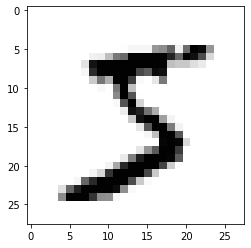

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='Greys')
plt.show

In [9]:
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')/255  #픽셀은 밝기에 따라 0부터 255까지의 등급을 매긴다. 
x_test = x_test.reshape(x_test.shape[0],784).astype('float32')/255

In [10]:
x_train.shape

(60000, 784)

In [11]:
x_test.shape

(10000, 784)

In [12]:
y_test.shape

(10000,)

In [13]:
y_train.shape

(60000,)

In [14]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [15]:
model = Sequential()
model.add(Dense(512,input_dim=784, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 학습

In [17]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [18]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=30, batch_size=200, callbacks=[early_stopping_callback])

Epoch 1/30
300/300 [==============================] - 2s 6ms/step - loss: 0.3044 - accuracy: 0.9144 - val_loss: 0.1548 - val_accuracy: 0.9544
Epoch 2/30
300/300 [==============================] - 2s 5ms/step - loss: 0.1256 - accuracy: 0.9644 - val_loss: 0.1059 - val_accuracy: 0.9694
Epoch 3/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0830 - accuracy: 0.9767 - val_loss: 0.0798 - val_accuracy: 0.9758
Epoch 4/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0601 - accuracy: 0.9831 - val_loss: 0.0808 - val_accuracy: 0.9760
Epoch 5/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0453 - accuracy: 0.9872 - val_loss: 0.0702 - val_accuracy: 0.9787
Epoch 6/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0348 - accuracy: 0.9904 - val_loss: 0.0600 - val_accuracy: 0.9807
Epoch 7/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0267 - accuracy: 0.9930 - val_loss: 0.0605 - val_accuracy: 0.9820
Epoch 

In [19]:
model.evaluate(x_test,y_test)[1]

313/313 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9834


0.9833999872207642

In [20]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

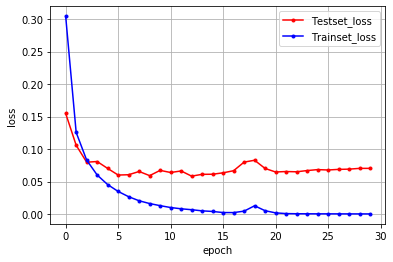

In [21]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss,marker='.', c='red',label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',c='blue',label='Trainset_loss')

plt. legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()